### About
### Build a machine learning model that can calculate the time the delivery person takes to deliver the order.

### Import the necessary packages and libraries.

In [1]:
!pip install klib -q

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import klib

import datetime
from scipy.stats import skew, kurtosis
from prettytable import PrettyTable

### Import train and test dataset

In [4]:
train=pd.read_csv("../input/amazonbusinessresearchanalysthiringchallenge/train.csv")
test=pd.read_csv("../input/amazonbusinessresearchanalysthiringchallenge/test.csv")

### Change column names in train and test dataset to lowercase.

In [5]:
train=train.rename(columns={col:re.sub("\s","_",col.lower())   for col in train.columns.values})
test=test.rename(columns={col:re.sub("\s","_",col.lower())  for col in test.columns.values})

### Structure of the train and test dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    45593 non-null  int64  
 1   id                           45593 non-null  object 
 2   delivery_person_id           45593 non-null  object 
 3   delivery_person_age          43739 non-null  float64
 4   delivery_person_ratings      43685 non-null  float64
 5   restaurant_latitude          45593 non-null  float64
 6   restaurant_longitude         45593 non-null  float64
 7   delivery_location_latitude   45593 non-null  float64
 8   delivery_location_longitude  45593 non-null  float64
 9   order_date                   45593 non-null  object 
 10  time_orderd                  43862 non-null  object 
 11  time_order_picked            45593 non-null  object 
 12  weather_conditions           44977 non-null  object 
 13  road_traffic_den

#### The above information shows that there are 45593 data entries and 21 columns.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_name                    11399 non-null  int64  
 1   id                           11399 non-null  object 
 2   delivery_person_id           11399 non-null  object 
 3   delivery_person_age          10908 non-null  float64
 4   delivery_person_ratings      10892 non-null  float64
 5   restaurant_latitude          11399 non-null  float64
 6   restaurant_longitude         11399 non-null  float64
 7   delivery_location_latitude   11399 non-null  float64
 8   delivery_location_longitude  11399 non-null  float64
 9   order_date                   11399 non-null  object 
 10  time_orderd                  10955 non-null  object 
 11  time_order_picked            11399 non-null  object 
 12  weather_conditions           11241 non-null  object 
 13  road_traffic_den

#### The above information shows that there are 11399 data entries and 20 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [8]:
train.isnull().sum()

file_name                         0
id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_(min)                  0
dtype: int64

In [9]:
train.columns[train.isnull().any()]

Index(['delivery_person_age', 'delivery_person_ratings', 'time_orderd',
       'weather_conditions', 'road_traffic_density', 'multiple_deliveries',
       'festival', 'city'],
      dtype='object')

#### The above information shows that there are missing values in the columns delivery_person_age, delivery_person_ratings, time_orderd, weather_conditions, road_traffic_density, multiple_deliveries, festival, city

In [10]:
test.isnull().sum()

file_name                        0
id                               0
delivery_person_id               0
delivery_person_age            491
delivery_person_ratings        507
restaurant_latitude              0
restaurant_longitude             0
delivery_location_latitude       0
delivery_location_longitude      0
order_date                       0
time_orderd                    444
time_order_picked                0
weather_conditions             158
road_traffic_density           154
vehicle_condition                0
type_of_order                    0
type_of_vehicle                  0
multiple_deliveries            238
festival                        65
city                           324
dtype: int64

In [11]:
test.columns[test.isnull().any()]

Index(['delivery_person_age', 'delivery_person_ratings', 'time_orderd',
       'weather_conditions', 'road_traffic_density', 'multiple_deliveries',
       'festival', 'city'],
      dtype='object')

#### The above information shows that there are missing values in the columns delivery_person_age, delivery_person_ratings, time_orderd, weather_conditions, road_traffic_density, multiple_deliveries, festival, city

### Let's see the glimpse of train dataset

In [12]:
train.head()

,file_name,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,...,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_(min)
0,22341,0x1634,COIMBRES02DEL01,33.0,4.9,11.022477,76.995667,11.132477,77.105667,16-03-2022,...,23:10,Sandstorm,Low,0,Meal,motor,1.0,No,Metropolitian,29.0
1,20430,0x9d56,RANCHIRES18DEL02,32.0,4.1,23.351489,85.324253,23.371489,85.344253,26-03-2022,...,11:20,Stormy,High,2,Drinks,scooter,2.0,No,Metropolitian,34.0
2,37824,0x44a8,COIMBRES01DEL01,35.0,4.8,11.016298,76.972076,11.126298,77.082076,06-03-2022,...,18:45,Fog,Medium,0,Buffet,motor,2.0,No,Urban,37.0
3,36230,0xc01,INDORES01DEL01,24.0,4.5,22.695207,75.866059,22.705207,75.876059,19-03-2022,...,9:15,Stormy,Low,2,Meal,motor,0.0,No,Metropolitian,10.0
4,1893,0x311e,CHENRES17DEL02,33.0,4.5,13.045479,80.233110,13.095479,80.283110,28-03-2022,...,18:05,Stormy,Medium,1,Buffet,motor,1.0,No,Metropolitian,27.0


### Let's create a function for box plot.

In [17]:
def box_plot(df,col,rot=None,title=""):
    _=plt.figure(figsize=(8,6))
    _=sns.boxplot(y=df[col])
    _=plt.title(title+" Distribution",fontsize=25)
    _=plt.ylabel(col,fontsize=20,rotation=rot)
    _=plt.yticks(fontsize=14)


### Let's see the target column(time_taken_(min)) distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Figure size 1080x720 with 0 Axes>

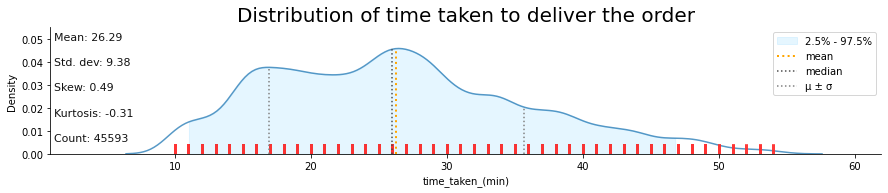

In [15]:
plt.figure(figsize=(15,10))
klib.dist_plot(train['time_taken_(min)']);
plt.title("Distribution of time taken to deliver the order",fontsize=20);

In [16]:
train['time_taken_(min)'].describe()

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: time_taken_(min), dtype: float64

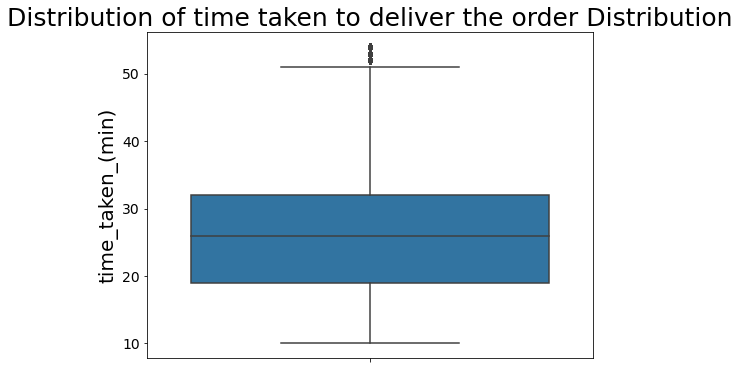

In [18]:
box_plot(train,'time_taken_(min)',rot=90,title="Distribution of time taken to deliver the order")

#### The above histogram explains that the target(time_taken_(min)) column is normally distrributed.

#### The delivery time for the order ranges from 10 to 54 minutes.

#### The average time to deliver the order is 26.3 minutes.

#### The boxplot explains that there are outliers above the third quartile.

### Let's see the numerical columns distribution by using kernel density plot.

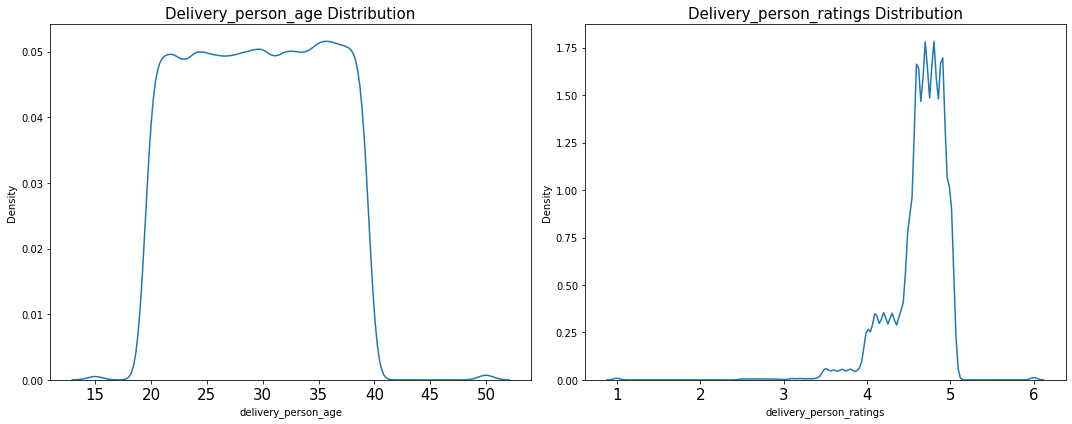

In [19]:
fig=plt.subplots(figsize=(15, 6))
for i,col  in enumerate(train.iloc[:,3:5].columns.values):    
       _=plt.subplot(1,2,i+1)
       _=sns.kdeplot(x=train[col])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

In [20]:
kde_plot_summary = PrettyTable([i.capitalize() for i in['name','skew','kurtosis','mean','median','mean>median']])
kde_plot_summary.align['Name']="l"
for field in ['skew','kurtosis','mean','median']:
    kde_plot_summary.align[field]="r"
    


for num, col  in enumerate(train.iloc[:,3:5].columns.values):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")

    d.append(round(skew(train[col].dropna(), axis=0, bias=True),3))
    d.append(round(kurtosis(train[col].dropna(), axis=0, bias=True),3))
    d.append(round(train[col].describe()[1],3))
    d.append(round(train[col].describe()[6],3))
    d.append(train[col].describe()[1]>train[col].describe()[6])
    kde_plot_summary.add_row(d)

In [21]:
kde_plot_summary

Name,Skew,Kurtosis,Mean,Median,Mean>median
1.Delivery_person_age,0.019,-1.058,29.567,35.0,False
2.Delivery_person_ratings,-2.493,15.669,4.634,4.9,False


#### The above density plot and summary explains that the Delivery_person_ratings column is strongly negative skewed and the Delivery_person_age column's kurtosis negative so the distribution is flat.

### Let's see the numerical columns distribution by using boxplot.

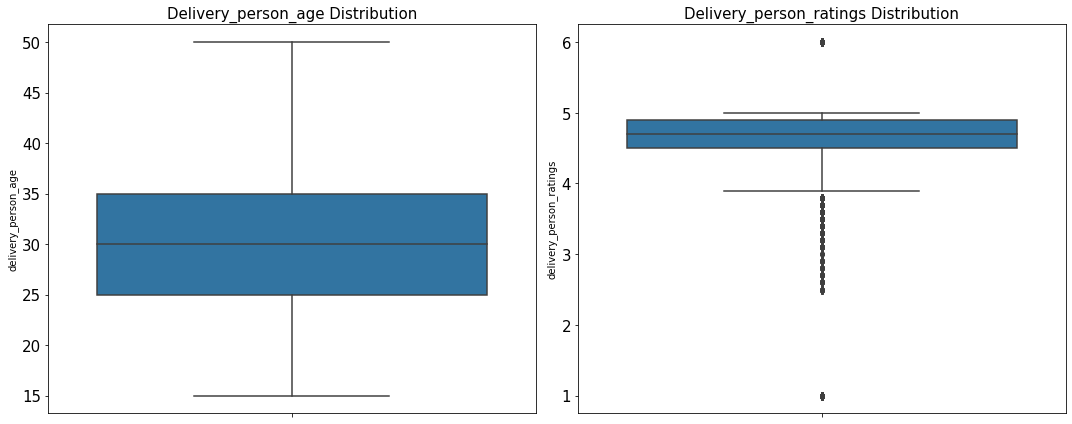

In [22]:
fig=plt.subplots(figsize=(15, 6))
for i,col  in enumerate(train.iloc[:,3:5].columns.values):    
       _=plt.subplot(1,2,i+1)
       _=sns.boxplot(y=train[col])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.ylabel(col,fontsize=10)
       _=plt.yticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

In [23]:
box_plot_summary = PrettyTable([i.capitalize() for i in['name', 'min', 'Q1-25%', 'Q2(Median)50%', 'Q3-75%', 'max','iqr','lower limit','upper limit','outlier']])
box_plot_summary.align["Name"] = "l"

for num, col  in enumerate(train.iloc[:,3:5].columns.values):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(train[col].describe()[3],3))
    d.append(round(train[col].describe()[4],3))
    d.append(round(train[col].describe()[5],3))
    d.append(round(train[col].describe()[6],3))
    d.append(round(train[col].describe()[7],3))
    d.append(round(train[col].describe()[6]-train[col].describe()[4],3))
    low_limit=round(train[col].describe()[4]-1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    up_limit=round(train[col].describe()[6]+1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    d.append(low_limit)
    d.append(low_limit)
    d.append(any([(any(i < low_limit for i in train[col].values)), (any(i > up_limit for i in train[col].values))]))
    
    box_plot_summary.add_row(d)
  

In [24]:
box_plot_summary

Name,Min,Q1-25%,Q2(median)50%,Q3-75%,Max,Iqr,Lower limit,Upper limit,Outlier
1.Delivery_person_age,15.0,25.0,30.0,35.0,50.0,10.0,10.0,10.0,False
2.Delivery_person_ratings,1.0,4.5,4.7,4.9,6.0,0.4,3.9,3.9,True


#### The above boxplot and summary explain that there are outliers(based on the turkey fences) in the Delivery_person_ratings column of the train dataset.

### Let's see categorical columns distribution

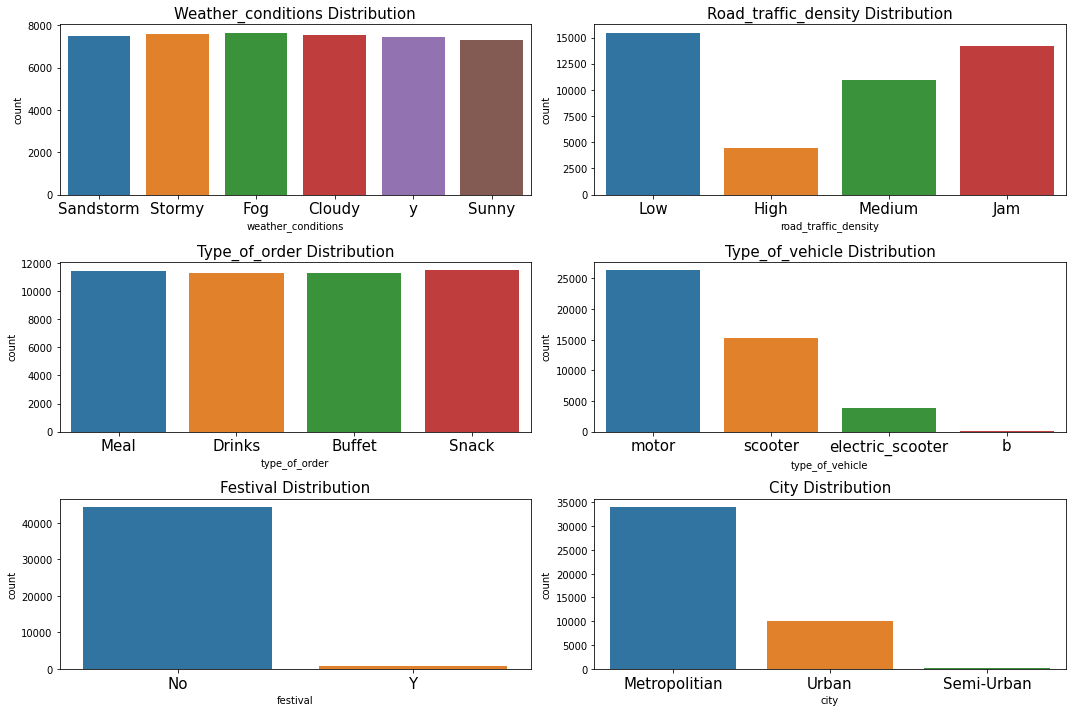

In [27]:
fig=plt.subplots(figsize=(15, 10))
for i,col  in enumerate(['weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']):    
       _=plt.subplot(3,2,i+1)
       _=sns.countplot(x=train[col])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

### Let's see  delivery time distribution by different categorical columns

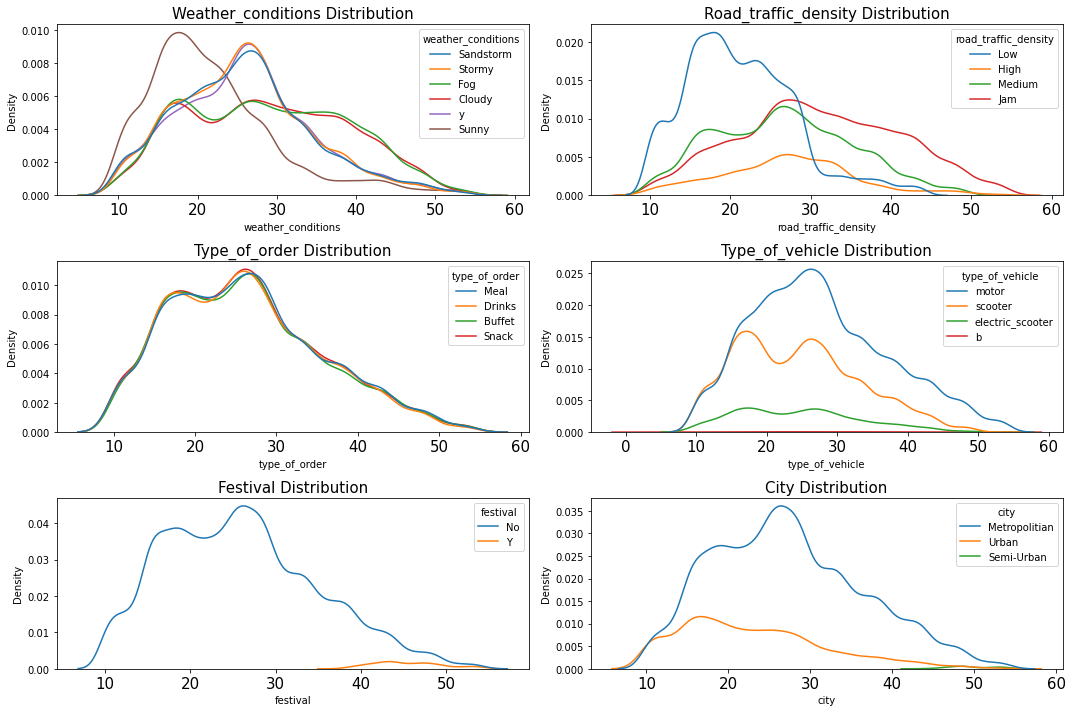

In [29]:
fig=plt.subplots(figsize=(15, 10))
for i,col  in enumerate(['weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']):    
       _=plt.subplot(3,2,i+1)
       _=sns.kdeplot(x=train['time_taken_(min)'],hue=train[col])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()

### Let's see  delivery time distribution by different categorical columns

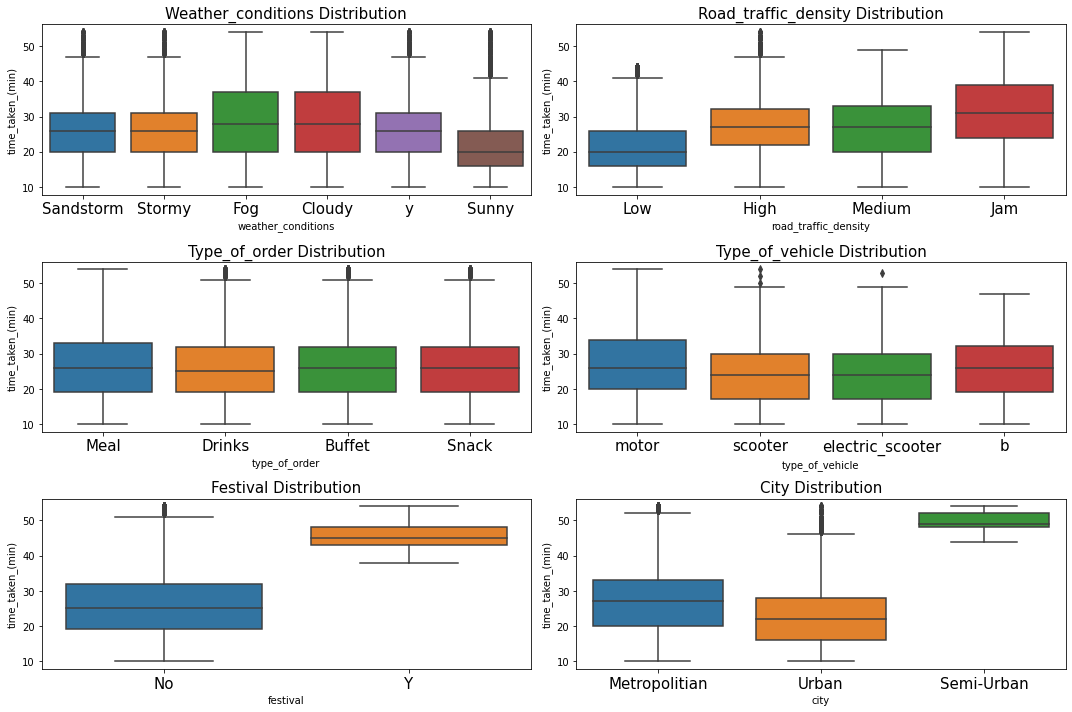

In [28]:
fig=plt.subplots(figsize=(15, 10))
for i,col  in enumerate(['weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']):    
       _=plt.subplot(3,2,i+1)
       _=sns.boxplot(x=train[col],y=train['time_taken_(min)'])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  